# Testing code for later development
## Load a saved frontnet model

In [2]:
import torch
import numpy as np
import sys

sys.path.insert(0,'../pulp-frontnet/PyTorch')
from Frontnet.Frontnet import FrontnetModel

In [3]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [4]:
model_params = FrontnetModel.configs['160x32']
model = FrontnetModel(**model_params)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 48, 80]             800
       BatchNorm2d-2           [-1, 32, 48, 80]              64
              ReLU-3           [-1, 32, 48, 80]               0
         MaxPool2d-4           [-1, 32, 24, 40]               0
            Conv2d-5           [-1, 32, 12, 20]           9,216
       BatchNorm2d-6           [-1, 32, 12, 20]              64
              ReLU-7           [-1, 32, 12, 20]               0
            Conv2d-8           [-1, 32, 12, 20]           9,216
       BatchNorm2d-9           [-1, 32, 12, 20]              64
             ReLU-10           [-1, 32, 12, 20]               0
        ConvBlock-11           [-1, 32, 12, 20]               0
           Conv2d-12            [-1, 64, 6, 10]          18,432
      BatchNorm2d-13            [-1, 64, 6, 10]             128
             ReLU-14            [-1, 64

In [5]:
model_path = '../pulp-frontnet/PyTorch/Models/Frontnet160x32.pt'
model.load_state_dict(torch.load(model_path, map_location=device)['model'])

<All keys matched successfully>

## Load the image data
The training and testsets need to be downloaded following the tutorial provided by the Frontnet devs:
```bash
$ cd pulp-frontnet/PyTorch
$ curl https://drive.switch.ch/index.php/s/FMQOLsBlbLmZWxm/download -o pulp-frontnet-data.zip
$ unzip pulp-frontnet-data.zip
$ rm pulp-frontnet-data.zip
```
Now the data can be loaded as follows:

In [6]:
from Frontnet.DataProcessor import DataProcessor
from Frontnet.Dataset import Dataset
from torch.utils import data

In [7]:
testset_path = '../pulp-frontnet/PyTorch/Data/160x96StrangersTestset.pickle'
data_params = {'batch_size': 32, 'shuffle': False, 'num_workers': 1}

# Load the test data
[x_test, y_test] = DataProcessor.ProcessTestData(testset_path)

# Create the PyTorch data loaders
test_set = Dataset(x_test, y_test)
test_loader = data.DataLoader(test_set, **data_params)

## Plot images and labels

In [8]:
import matplotlib.pyplot as plt

In [9]:
# test_loader returns a list containing:
# a batch of images,
# and the corresponding true labels
images, labels = next(iter(test_loader))
print("Shape of the images: ", images.shape)
print("Shape of the labels: ", labels.shape)

Shape of the images:  torch.Size([32, 1, 96, 160])
Shape of the labels:  torch.Size([32, 4])


Pose of the human in the image: (2.71, 1.65, 0.46)
Rotation angle w.r.t. z-axis: 0.99


(-0.5, 159.5, 95.5, -0.5)

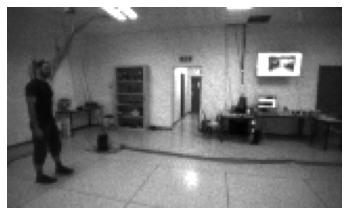

In [23]:
print("Pose of the human in the image: (%.2f, %.2f, %.2f)" % (labels[0][0], labels[0][1], labels[0][2]))
print("Rotation angle w.r.t. z-axis: %.2f" % (labels[0][3]))
plt.imshow(images[0][0], cmap='gray')
plt.axis('off')